# Complex Numbers in Python

Contributors: Daniel Lay, TODO

A complex number $z=x+iy$ has a real part, $x$, and an imaginary part, $y$. In this notebook, we'll discuss:

- How to use complex numbers in Python, including common pitfalls
- When complex numbers show up in physics, and numerical methods for such problems (too grandiose?)
- The Fourier transformation
- Contour integration, and how to visualize it

## The Basics

Python has native support for complex numbers. To write a complex number, such as $3+4i$, you write the code '3+4 * 1j':

In [1]:
my_complex_number = 3 + 4*1j
print("type(my_complex_number):",type(my_complex_number))

type(my_complex_number): <class 'complex'>


As you can see, the variable 'my_complex_number' is of class 'complex', which is Python's way of saying it's a complex number. Additionally, some operations respect that this is a complex number. For instance, the 'abs' function now behaves as the mathematical operation $|z|=\sqrt{x^2+y^2}$, as we can check with our complex variable:

In [7]:
print('abs(my_complex_number):',abs(my_complex_number))

abs(my_complex_number): 5.0


As with most mathematical operations you've encountered (e.g. matrix operations), it is easier to work with numpy, and indeed, numpy has support for complex numbers. You can make an array like normal, except with complex entries:

In [10]:
import numpy as np

my_complex_array = np.array([3+4*1j,5+6.7*1j])
print('my_complex_array:',my_complex_array)

my_complex_array: [3.+4.j  5.+6.7j]


To check that this is a complex array, you can print 'my_complex_array.dtype' (if you instead type 'type(my_complex_array)', you just get np.ndarray back - Python can't tell the type of data inside of a numpy array):

In [11]:
print('my_complex_array.dtype:',my_complex_array.dtype)

my_complex_array.dtype: complex128


Conceptual check number TODO: how would you implement the Pauli matrices in numpy?

Numpy also lets you multiply by scalars (real or complex), like you would expect:

In [14]:
print('2 * my_complex_array:',2*my_complex_array)
print('1j * my_complex_array):',1j*my_complex_array)
print('(2+3*1j) * my_complex_array):',(2+3*1j)*my_complex_array)

2 * my_complex_array: [ 6. +8.j  10.+13.4j]
1j * my_complex_array): [-4. +3.j -6.7+5.j]
(2+3*1j) * my_complex_array): [ -6. +17.j  -10.1+28.4j]


And, you can take the complex conjugate of the array (element-wise):

In [16]:
print('my_complex_array:',my_complex_array)
print('np.conjugate(my_complex_array):',np.conjugate(my_complex_array))

my_complex_array: [3.+4.j  5.+6.7j]
np.conjugate(my_complex_array): [3.-4.j  5.-6.7j]


As a quick conceptual check: how would you take the *Hermitian conjugate* of 'my_complex_array' (i.e. the conjugate transpose)? TODO clever thing Josh did

If you decide that you only care about the real part of an array, numpy lets you access that nicely:

In [17]:
print('np.real(my_complex_array):',np.real(my_complex_array))

np.real(my_complex_array): [3. 5.]


Be warned, though: often times, functions in other packages discard the imaginary part of the array, which can lead to unexpected behavior! Typically they will warn you about this, but it can be a problem! TODO: find an example

Other things to cover:
- Matrix multiplication (assuming they've implemented Pauli matrices)
- Eigenvalues/eigenvectors (eig vs eigh?)
- Inner products
- Hermitian matrices?
- Special functions evaluated at complex arguments? (maybe when talking about Riemann sheets?)

## The Fourier Transform

Where to start with this...

- Nice example that can be computed by hand (sin function? sum of trig functions? sum of complex exponentials?)
- Defined in integral case as blah
- Defined in sum case as blah
- Naive implementation vs FFT (runtime?)
- It's a basis change! and what that tells us for obvious case
- More complicated thing - take random noise around the sin function, and take discrete Fourier transform to reveal structure (maybe sin(x) + 0.01 * sin(40x) - looks like noise, but is actually two signals)

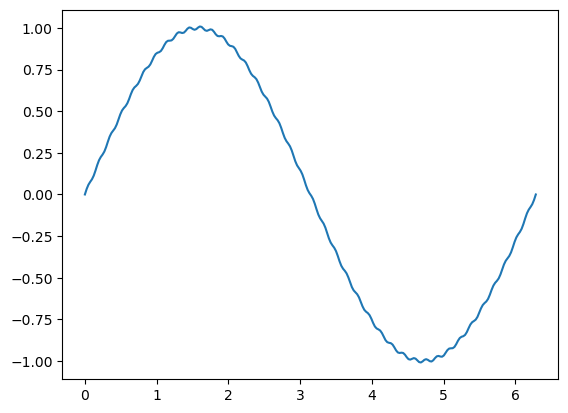

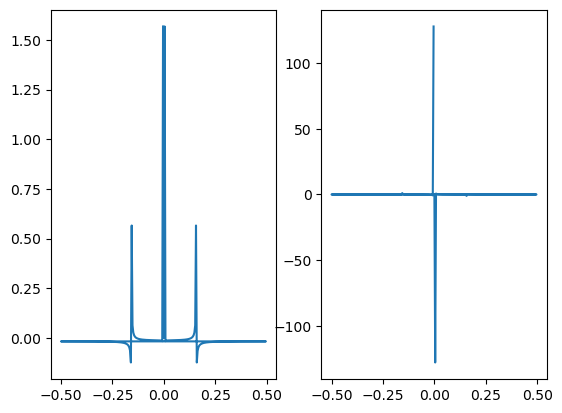

In [43]:
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,256)

f = lambda x: np.sin(x) + 0.01 * np.sin(40*x)
fEval = f(x)

fig, ax =plt.subplots()
ax.plot(x,fEval)

freq = np.fft.fftfreq(x.shape[-1])
fftEval = np.fft.fft(fEval)
fig, ax = plt.subplots(ncols=2,sharex=True)
ax[0].plot(freq,np.real(fftEval))
ax[1].plot(freq,np.imag(fftEval))

# Differential Equation Example

Complex numbers commonly arise in differential equations. For example, consider the following equation of motion

$$
\begin{align}
\frac{d^{2}x}{dt^{2}} + 2\gamma \frac{dx}{dt} + \omega^{2} x = 0 \\
x(t = 0) = 0, \hspace{3mm} \frac{d x}{dt}(t = 0) = 1
\end{align}
$$
where $\gamma$ and $\omega$ are real numbers. This is Newton's second law for a harmonic oscillator with frequency $\omega$ however we added a first derivative term. The first derivative acts as a "friction term" that causes damping of the harmonic motion. The number $\gamma$ characterizes the strength of the friction.  We will solve this analytically and numerically using Scipy's ODE solver. The characteristic polynomial is 
$$
\begin{align}
r^{2} + 2\gamma r + \omega^{2} = 0 
\end{align}
$$
The roots of this equation are given by 
$$
\begin{align}
r = -\gamma \pm \sqrt{\gamma^{2} -  \omega^{2}} = -\gamma \pm  \gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}
\end{align}
$$
and the general solution is given by 
$$
\begin{align}
x(t) = c_{1} e^{r_{1} t}  + c_{2} e^{r_{2}t} = c_{1} e^{-\gamma t} e^{\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t} + c_{2} e^{-\gamma t} e^{-\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t}
\end{align}
$$
We will assume $\gamma\neq 0$. Now at this point, we note that if $ \frac{\omega^{2}}{\gamma^{2}} < 1$, then the square root function remains real and the solution is exponential. However, if $ \frac{\omega^{2}}{\gamma^{2}} > 1$, the square root turns imaginary and we have complex exponentials. This means we have wave-like solutions. For this example, complex numbers naturally arise from the differential equation and are necessary for understanding physics described by Newton's equation. Let's see how the solutions look. Taking into account the initial conditions, the unique solution is 
$$
\begin{align}
x(t) = \frac{e^{-\gamma t}}{2\sqrt{\gamma^{2} - \omega^{2}}}\Big( e^{\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t} -  e^{-\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t}\Big)
\end{align}
$$


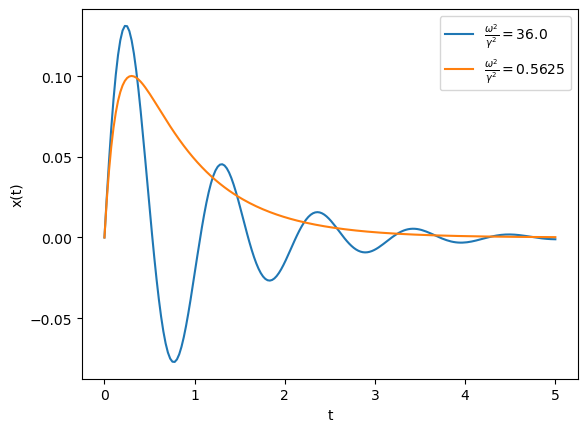

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define function for the exact solution
def x(t,gamma,omega):
    n1 = np.exp(-gamma*t)/(2*np.sqrt(gamma**2 - omega**2,dtype=complex))
    t1 = np.exp(gamma*np.sqrt(1 - omega**2 /gamma**2,dtype=complex)*t) 
    t2 = np.exp(-gamma*np.sqrt(1 - omega**2 /gamma**2,dtype=complex)*t)
    return n1*(t1 - t2)
# Define time grid to evaluate x(t) on
tArr = np.linspace(0,5,200)

# parameters for producing wave solutions
omega_wave = 6
gamma_wave = 1 
xArr_wave = x(tArr,gamma_wave,omega_wave)

# parameters for producing exponential solutions
omega_exp = 3
gamma_exp = 4
xArr_exp = x(tArr,gamma_exp,omega_exp)

#plot the two solutions
plt.plot(tArr,np.real(xArr_wave),label=r'$\frac{\omega^{2}}{\gamma^{2}} = $'+f'{(omega_wave/gamma_wave)**2}')
plt.plot(tArr,np.real(xArr_exp),label=r'$\frac{\omega^{2}}{\gamma^{2}} =$' +f'{(omega_exp/gamma_exp)**2}')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

# Numerical Solution
Now for fun, lets solve the same differential equation using scipy's ode integrator. Scipy's integration package requires one to rewrite your differential equation as a system of first order equations. Define the following
$$
\begin{align}
x &= u \\
\frac{dx}{dt} &= v
\end{align}
$$
Then, the 2nd order ODE becomes 
$$
\begin{align}
\frac{du}{dt} &= v \\
\frac{dv}{dt} &= -2 \gamma v - \omega^{2} u
\end{align}
$$

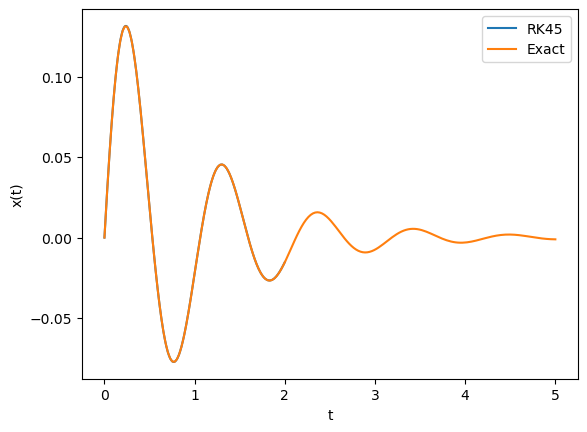

In [19]:
from scipy.integrate import solve_ivp

# initial conditions y0 = [x(t=0), dx/dt (t=0)]
y0 = [0.0, 1.0] 

# Define a function for scipy integrator to use.
def system(t,y, params):
    u, v = y
    dydt = [v, -2*params[0]*v - params[1]**2 *u]
    return dydt

sol = solve_ivp(system,t_span=[0,5],y0 = y0,t_eval= np.linspace(0,2,1000), args=[(gamma_wave, omega_wave)],method='RK45',dense_output=True)

plt.plot(sol.t, sol.y[0],label='RK45')
plt.plot(tArr,np.real(xArr_wave),label='Exact')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()